In [1]:
# Import the module
import importlib
import IsovizPy as ja
import pandas as pd

In [2]:
# Load data and create the database (note this may take 1-2 minutes)
gtf_file = '/gpfs/commons/home/kisaev/gencode.v46.basic.annotation.gtf'  
db = ja.create_db(gtf_file)

In [48]:
# After making changes to IsovizPy, reload it
importlib.reload(ja)

<module 'IsovizPy' from '/gpfs/commons/home/kisaev/Leaflet-private/src/visualization/IsovizPy.py'>

In [4]:
# Define the junctions and target format for conversion
junctions = [
    ("chr16", 8801910, 8804766, "+"),
    ("chr16", 8801910, 8806315, "+"),
    ("chr16", 8801910, 8811078, "+"),
    ("chr16", 8801910, 8811637, "+"),
    ("chr16", 8804843, 8806315, "+"),
    ("chr16", 8806407, 8811078, "+"),
    ("chr16", 8806407, 8811637, "+"),
    ("chr16", 8811178, 8811637, "+")
]

usage_ratios = [18.744780962953, 7.89318412512688, 2.37913085219687, 1.35807469410818, 23.1472731000205, 15.4033471840951, 10.8963492992115, 20.177859782288]

# Adjust the 'usage_ratio' values to be rounded to the nearest whole number for percentage format
data = {
    'junction_id': [f"{chrom}_{start}_{end}_{strand}" for chrom, start, end, strand in junctions],
    'Cluster': [55951] * len(junctions),  # Assign all to a single cluster for simplicity
    'usage_ratio': [round(ratio) for ratio in usage_ratios]  # Round to the nearest whole number
}

In [5]:
# Define the junctions and target format for conversion
junctions = [
    ("chr6", 41159882, 41161262, "-"),
    ("chr6", 41159882, 41163042, "-"),
    ("chr6", 41161613, 41163042, "-")
]

usage_ratios = [51.7128896529883, 6.08062253992671, 42.206487807085]

# Adjust the 'usage_ratio' values to be rounded to the nearest whole number for percentage format
data = {
    'junction_id': [f"{chrom}_{start}_{end}_{strand}" for chrom, start, end, strand in junctions],
    'Cluster': [55951] * len(junctions),  # Assign all to a single cluster for simplicity
    'usage_ratio': [round(ratio) for ratio in usage_ratios]  # Round to the nearest whole number
}

In [6]:
splice_adata_var = pd.DataFrame(data)
print(splice_adata_var)

                junction_id  Cluster  usage_ratio
0  chr6_41159882_41161262_-    55951           52
1  chr6_41159882_41163042_-    55951            6
2  chr6_41161613_41163042_-    55951           42


In [7]:
# Convert junction_ids
splice_junctions = ja.convert_junction_ids(splice_adata_var)
print(splice_junctions)

[{'chrom': 'chr6', 'start': 41159882, 'end': 41161262, 'name': 'junction_1', 'strand': '-', 'usage_ratio': 52}, {'chrom': 'chr6', 'start': 41159882, 'end': 41163042, 'name': 'junction_2', 'strand': '-', 'usage_ratio': 6}, {'chrom': 'chr6', 'start': 41161613, 'end': 41163042, 'name': 'junction_3', 'strand': '-', 'usage_ratio': 42}]


In [8]:
# Check junction annotations
junction_annotation_results = ja.check_junction_annotation(splice_junctions, db)
print(junction_annotation_results)

100%|██████████| 3/3 [00:00<00:00, 126.62it/s]

[{'junction': 'chr6:41159882-41161262', 'strand': '-', 'label_5_prime': "annotated on 5'", 'label_3_prime': "annotated on 3'", 'position_off_5_prime': 1, 'position_off_3_prime': 0, 'transcripts': ['ENST00000373122.8', 'ENST00000338469.3', 'ENST00000373113.8']}, {'junction': 'chr6:41159882-41163042', 'strand': '-', 'label_5_prime': "annotated on 5'", 'label_3_prime': "annotated on 3'", 'position_off_5_prime': 1, 'position_off_3_prime': 0, 'transcripts': ['ENST00000373122.8', 'ENST00000338469.3', 'ENST00000373113.8']}, {'junction': 'chr6:41161613-41163042', 'strand': '-', 'label_5_prime': "annotated on 5'", 'label_3_prime': "annotated on 3'", 'position_off_5_prime': 1, 'position_off_3_prime': 0, 'transcripts': ['ENST00000373122.8', 'ENST00000338469.3', 'ENST00000373113.8']}]


In [9]:
# Extract unique transcript IDs from junction_labels
unique_transcripts = list({transcript for label in junction_annotation_results for transcript in label['transcripts']})
print(unique_transcripts)

['ENST00000373122.8', 'ENST00000338469.3', 'ENST00000373113.8']


In [11]:
# Fetch transcript exon coordinates and determine plot boundaries
transcript_data = ja.fetch_transcripts_and_annotations(unique_transcripts, db)
region_start, region_end = ja.determine_region_boundaries(splice_junctions)

In [12]:
ja.check_junction_annotation(splice_junctions, db)

100%|██████████| 3/3 [00:00<00:00, 114.86it/s]


[{'junction': 'chr6:41159882-41161262',
  'strand': '-',
  'label_5_prime': "annotated on 5'",
  'label_3_prime': "annotated on 3'",
  'position_off_5_prime': 1,
  'position_off_3_prime': 0,
  'transcripts': ['ENST00000373122.8',
   'ENST00000338469.3',
   'ENST00000373113.8']},
 {'junction': 'chr6:41159882-41163042',
  'strand': '-',
  'label_5_prime': "annotated on 5'",
  'label_3_prime': "annotated on 3'",
  'position_off_5_prime': 1,
  'position_off_3_prime': 0,
  'transcripts': ['ENST00000373122.8',
   'ENST00000338469.3',
   'ENST00000373113.8']},
 {'junction': 'chr6:41161613-41163042',
  'strand': '-',
  'label_5_prime': "annotated on 5'",
  'label_3_prime': "annotated on 3'",
  'position_off_5_prime': 1,
  'position_off_3_prime': 0,
  'transcripts': ['ENST00000373122.8',
   'ENST00000338469.3',
   'ENST00000373113.8']}]

['TREM2']
Plot saved to TREM2_usage_no_lines_20241031.pdf!


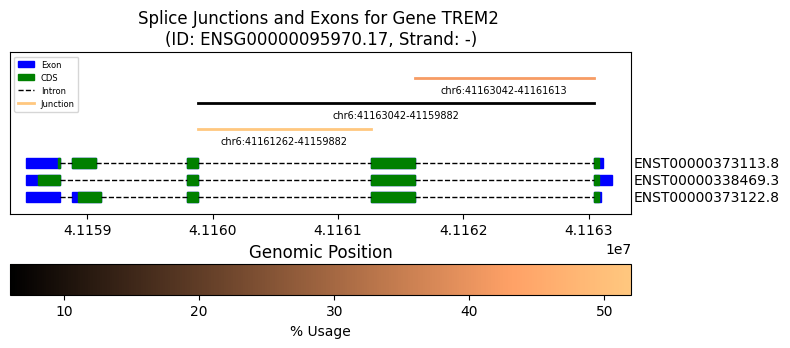

In [63]:
# Plot the annotations and splice junctions
ja.plot_exons_and_junctions(db, transcript_data, splice_junctions, region_start-500, region_end-700, base_width=8, trans_height=0.2, show_usage=True, show_junc_lines=False)